In [85]:
import tensorflow.compat.v1 as tf # 1.xxversion을 사용
tf.disable_v2_behavior() #2.xx version 기능 사용불가
#tf 1.xx version -> 2.xx version
import random
# from tensorflow.examples.tutorials.mnist import input_data
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
#tf 1.xx version -> 2.xx version
%matplotlib inline

In [86]:
(xtrain, ytrain),(xtest, ytest)=mnist.load_data()

In [87]:
xtrain.shape
ytrain.shape


(60000,)

In [88]:
xval = xtrain[50000:]
yval = ytrain[50000:]
xtrain=xtrain[:50000]
ytrain=ytrain[:50000]

In [89]:
xtrain=xtrain.reshape(50000,784).astype('float32')/255.0 #3차원에서 2차원으로
xval =xval.reshape(10000,784).astype('float32')/255.0
xtest =xtest.reshape(10000,784).astype('float32')/255.0

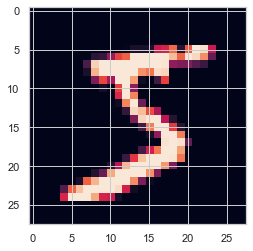

In [90]:
plt.imshow(xtrain[0].reshape(28,28))

<h3>케라스 코딩</h3>
<hr>
1)데이터 셋 생성(훈련/ 검증/ 시험 생성)   <br>
2) 모델구성 (Sequential(간단한 모델), 함수 API(복잡한 모델))    <br>
3) 모델 학습 과정 설정(cost함수, 옵티마이저 정의) - compile함수     <br>
4) 모델 락습시키기 (train data) = fit 함수   <br>
5) 학습과정 확인(훈련셋/ 검증셋 cost, 정확도 측정) -> 모델   <br>
6) 모델 평가(test data) - evalute 함수   <br>
7) 모델 사용  - predict 함수   <br>

In [91]:
trainRandIdx=np.random.choice(50000,700)
valRandIdx=np.random.choice(10000,300)

In [92]:
xtrain=xtrain[trainRandIdx]
ytrain=ytrain[trainRandIdx]
xval=xval[valRandIdx]
yval=yval[valRandIdx]

In [93]:
yval.shape

(300,)

In [94]:
ytrain=np_utils.to_categorical(ytrain)
yval=np_utils.to_categorical(yval)
ytest=np_utils.to_categorical(ytest)
#원핫인코딩

In [95]:
#2. 모델 구성,    입력계층 히든계층 출력계층
model=Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu')) #레이어 설계
#입력:784, 출력:2인 레이어 추가(add)
model.add(Dense(units=10, activation='softmax'))


In [96]:
#3 모델 학습과정 ㅅ정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
#sgd :경사하강법

In [97]:
#모델 학습시키기
hist= model.fit(xtrain, ytrain, batch_size=10, epochs=1000, validation_data=(xval,yval) )

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 120us/sample - loss: 2.2850 - acc: 0.1814 - val_loss: 2.2757 - val_acc: 0.1567
Epoch 2/1000
700/700 [==============================] - 0s 86us/sample - loss: 2.2348 - acc: 0.1743 - val_loss: 2.2272 - val_acc: 0.1467
Epoch 3/1000
700/700 [==============================] - 0s 115us/sample - loss: 2.1809 - acc: 0.1686 - val_loss: 2.1900 - val_acc: 0.1500
Epoch 4/1000
700/700 [==============================] - 0s 74us/sample - loss: 2.1317 - acc: 0.1757 - val_loss: 2.1579 - val_acc: 0.1533
Epoch 5/1000
700/700 [==============================] - 0s 77us/sample - loss: 2.0912 - acc: 0.1700 - val_loss: 2.1112 - val_acc: 0.1700
Epoch 6/1000
700/700 [==============================] - 0s 76us/sample - loss: 2.0528 - acc: 0.1700 - val_loss: 2.0839 - val_acc: 0.1700
Epoch 7/1000
700/700 [==============================] - 0s 77us/sample - loss: 2.0180 - acc: 0.1857 - val_loss: 2.0507 - val_acc: 

In [100]:
# hist.history['loss'] #저장된cost

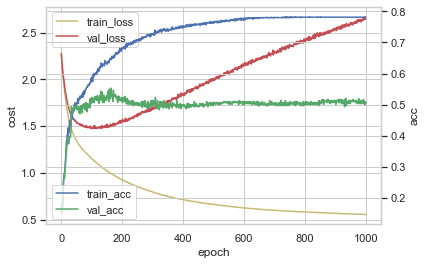

In [105]:
fig, axes = plt.subplots()
accax= axes.twinx()

axes.plot(hist.history['loss'],'y',label="train_loss")
axes.plot(hist.history['val_loss'],'r',label="val_loss")
accax.plot(hist.history['acc'],'b',label="train_acc")
accax.plot(hist.history['val_acc'],'g',label="val_acc")

axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('acc')

axes.legend(loc='upper left')
accax.legend(loc='lower left')

노랑색,빨간색☆☆  
오버피팅이 생기는 (epoch = 100 즈음)지점에서 멈춰줘야한다. 
val_loss 데이터가 train_loss 보다 큼...

<h1>prediction</h1>
<hr>
데이터 전부 사용해서 해보기

In [106]:
#1.데이터 생성
(xtrain, ytrain),(xtest, ytest)=mnist.load_data()
xtrain=xtrain.reshape(60000,784).astype('float32')/255.0 
xtest =xtest.reshape(10000,784).astype('float32')/255.0

ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)

In [107]:
# 2. 모델구성
model=Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu')) #레이어 설계
model.add(Dense(units=10, activation='softmax'))


In [110]:
# 3.모델 학습과정 설정 및 학습
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=32, epochs=50)


Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/sample - loss: 1.2386 - acc: 0.5677
Epoch 2/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.2064 - acc: 0.5875
Epoch 3/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.1748 - acc: 0.6053
Epoch 4/50
60000/60000 [==============================] - 1s 23us/sample - loss: 1.1460 - acc: 0.6249
Epoch 5/50
60000/60000 [==============================] - 1s 22us/sample - loss: 1.1183 - acc: 0.6402
Epoch 6/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0932 - acc: 0.6525
Epoch 7/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0727 - acc: 0.6610
Epoch 8/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0570 - acc: 0.6657
Epoch 9/50
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0441 - acc: 0.6707
Epoch 10/50
60000/60000 [==============================] - 

In [111]:
#모델평가하기
model.evaluate(xtest,ytest, batch_size=32)
#[cost, accuracy]

[0.9742150800704956, 0.6943]

In [117]:
#모델사용하기(분류)
# xtest[0:1]
yhat=model.predict(xtest[0:1])
yhat
np.sum(yhat[0])
#합은 1.0
np.max(yhat[0])
np.argmax(yhat[0]) 


7